Импортируем библиотеки, загружаем датасеты

In [22]:
# Импортируем библиотеки

import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Загружаем датасет

df_train = pd.read_csv('data/train.csv', low_memory=False)
df_train = pd.read_csv('data/valid.csv', low_memory=False)

Смотрим датасет

In [23]:
# Информация о датасете

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 2666 entries, report_date to col2663
dtypes: float64(2316), int64(3), object(347)
memory usage: 294.0+ MB


In [ ]:
# В виде таблицы

df_train.head()

,report_date,client_id,target,col1,col2,col3,col4,col5,col6,col7,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7616803.0,7616803.0,7616803.0,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164


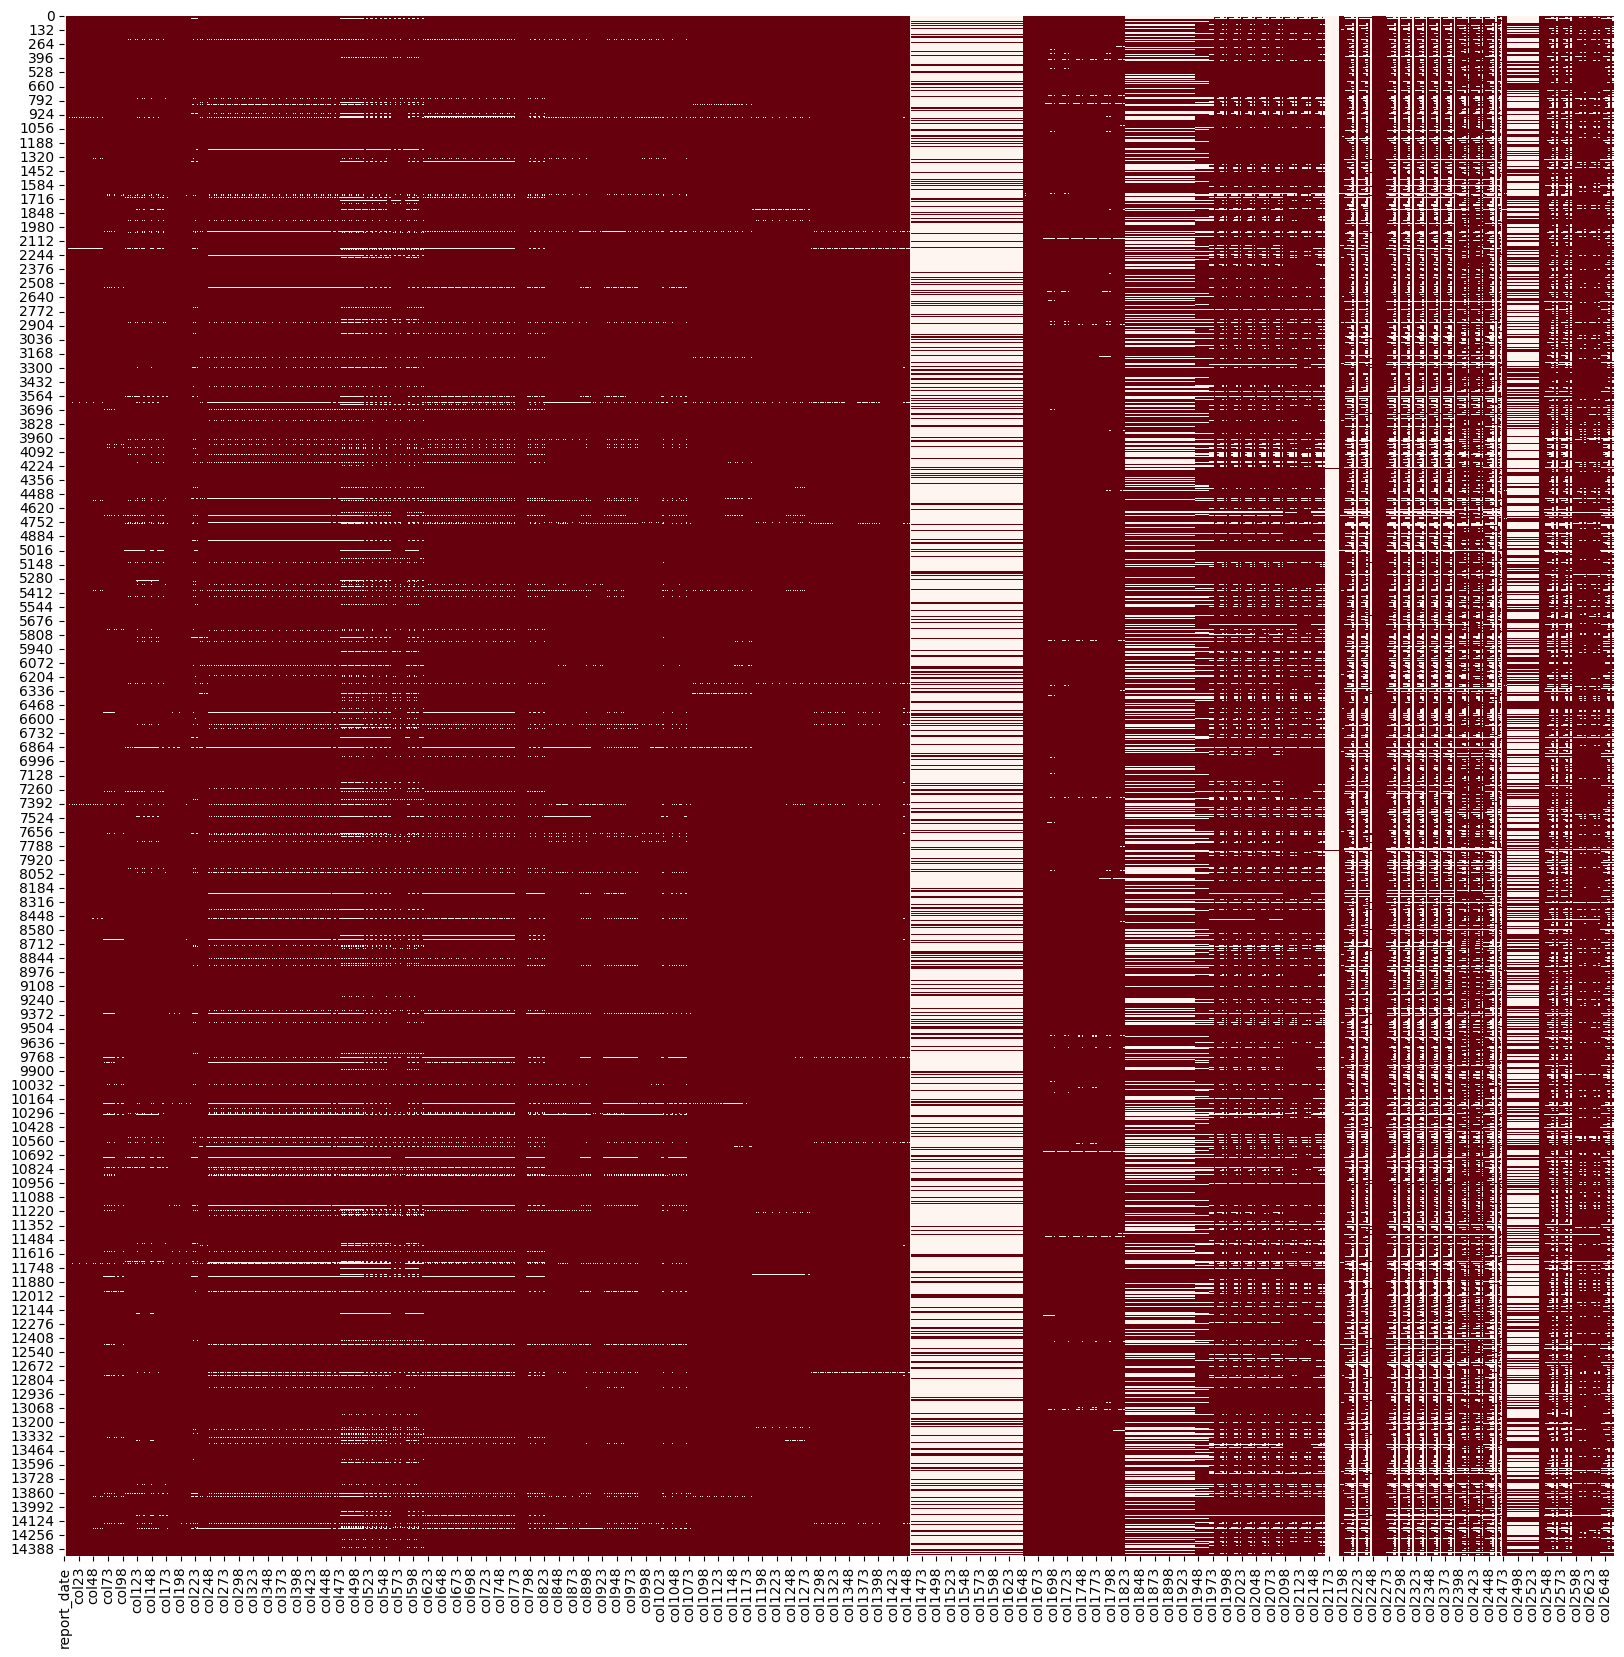

In [ ]:
# Хитмапа датасета

plt.figure(figsize=(20, 20))
sb.heatmap(df_train.isnull(), cbar=False, cmap='Reds')
plt.show()

Обрабатываем датасет

In [26]:
# Отбрасываем полностью пустые колонки
df_filtered = df_train.dropna(how='all')

# Минимальный процент информации в колонках, чтобы не быть отброшенными
threshold = 0.2

# Отбрасываем колонки в которых нет threshold % информации
df_filtered = df_filtered.loc[:, df_train.notnull().mean() >= threshold]

# Отбрасываем строки где нет целовой переменной
df_filtered = df_filtered.dropna(subset=['target'])

# Отбрасываем дубликаты
df_filtered = df_filtered.drop_duplicates()

# Отбрасываем ID клиентов?
df_filtered = df_filtered.drop(columns=['col1454'])

df_filtered.to_csv('data/train_filtered')

Смотрим на датасет после обработки

In [27]:
# Информация о датасете

df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 538 entries, report_date to col2663
dtypes: float64(534), int64(3), object(1)
memory usage: 59.3+ MB


In [28]:
# В виде таблицы

df_filtered.head()

,report_date,client_id,target,col1453,col1455,col1456,col1457,col1458,col1459,col1460,...,col2651,col2652,col2653,col2654,col2655,col2656,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,1,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,0,0.0,0.0,0.0,0.0,0.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164


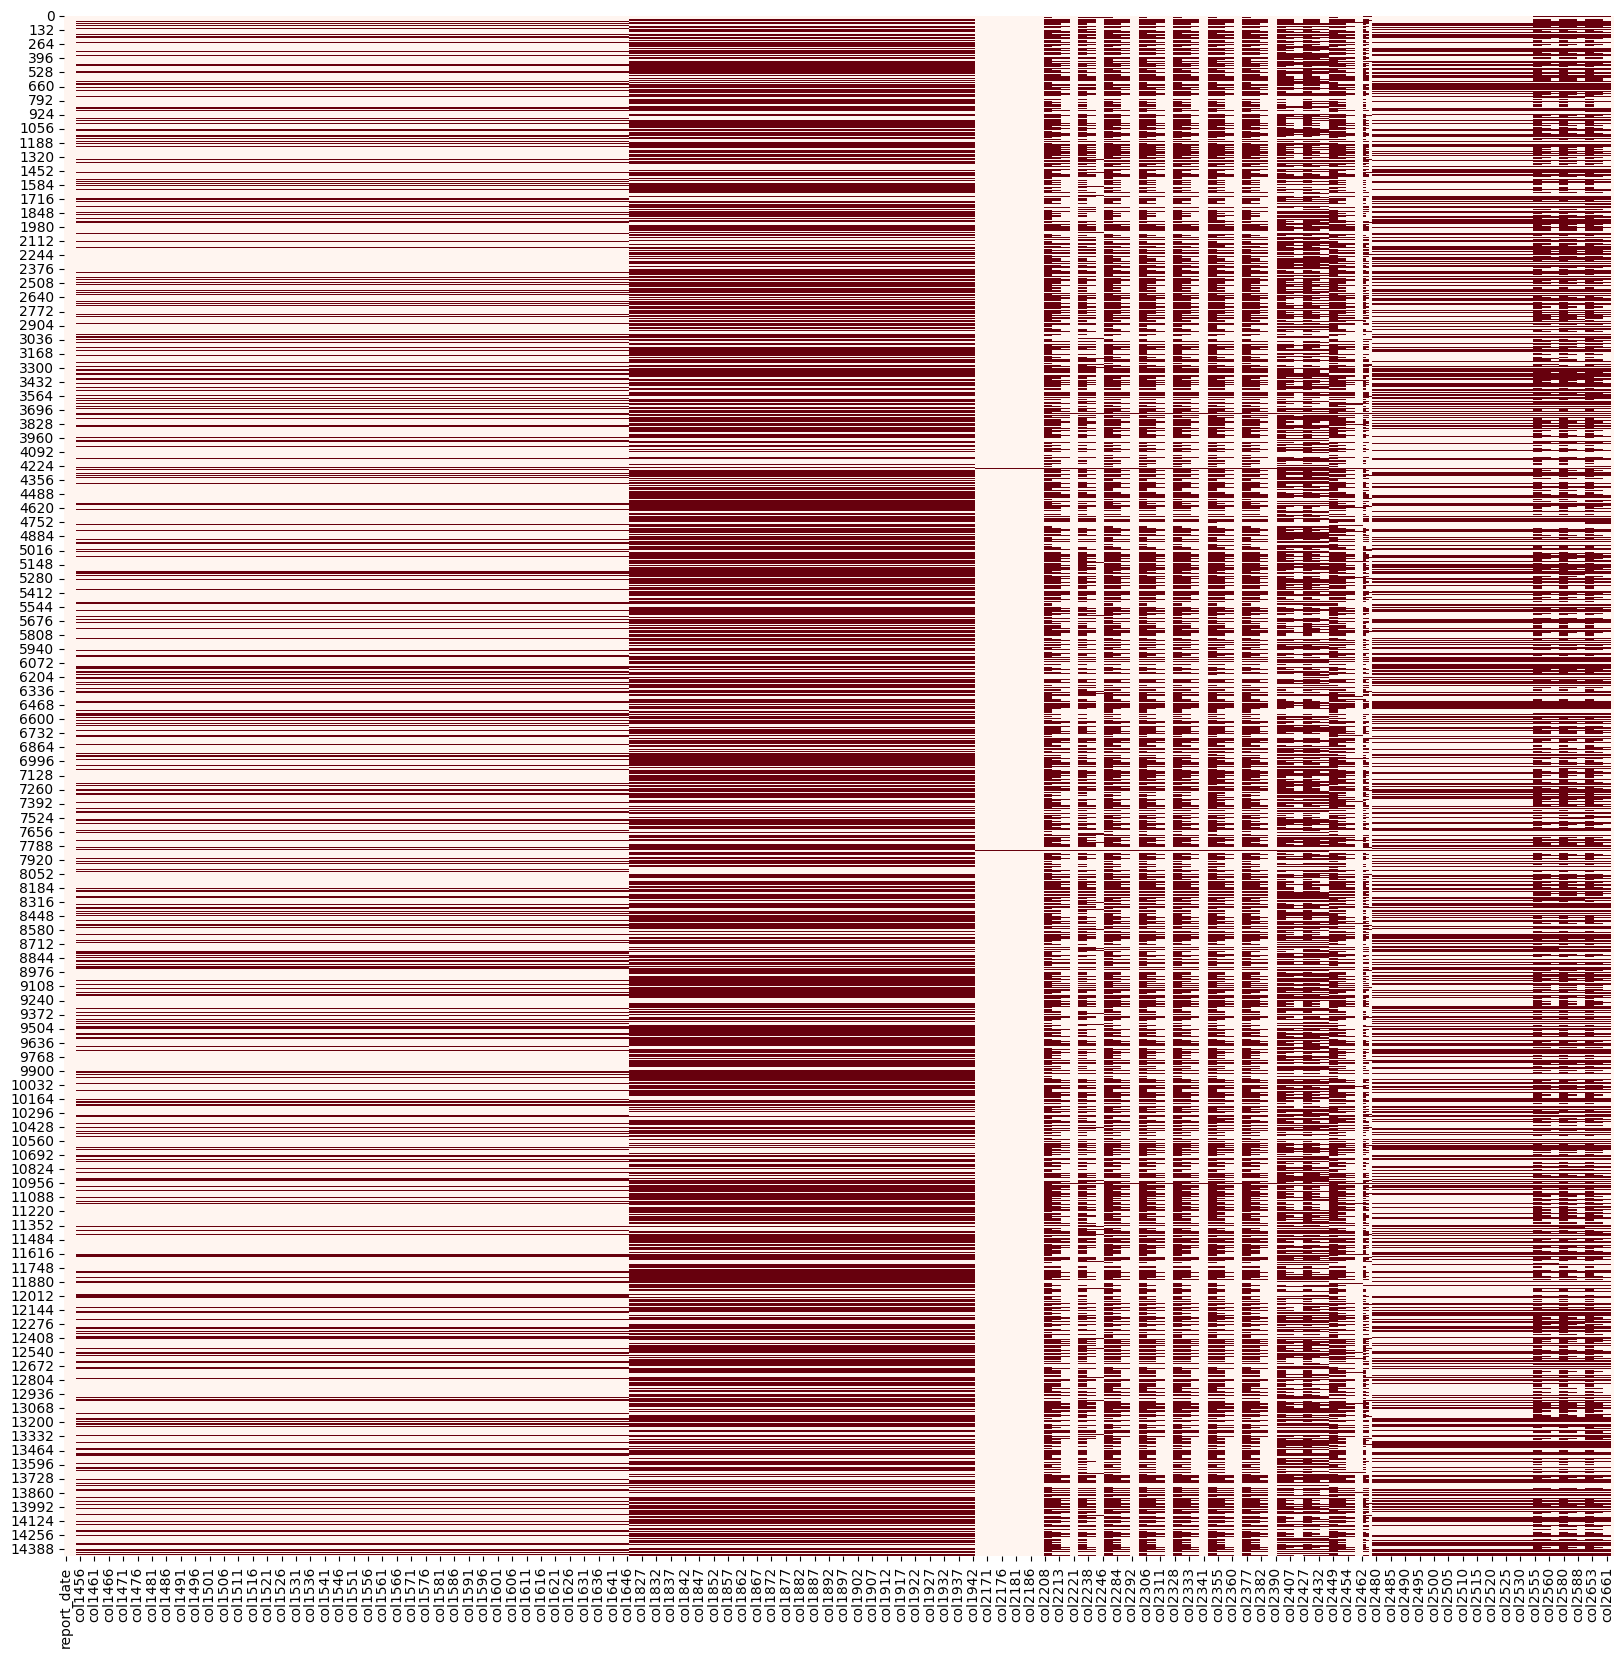

In [29]:
# Хитмапа датасета

plt.figure(figsize=(20, 20))
sb.heatmap(df_filtered.isnull(), cbar=False, cmap='Reds')
plt.show()

In [ ]:
# Посмотрим что внутри?

display(df_filtered.to_string())

KeyboardInterrupt: 